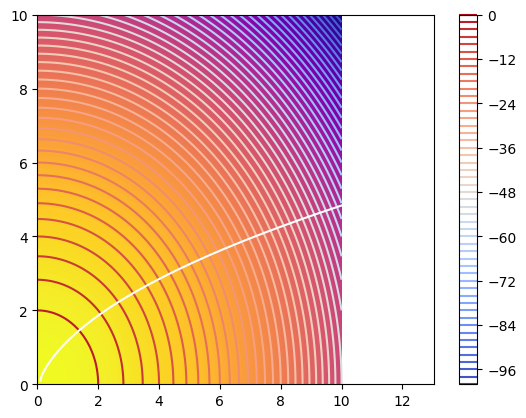

In [13]:
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint
import numpy as np

x, y = sp.symbols('x y')

Ex=(x+y**2)

Ey=(y)

#Potential calculation:
def V(x,y):

    f = sp.Function('f')(y)

    V=-sp.integrate(Ex,x)
    V1=V+f

    dVdy=-sp.diff(V1,y)

    f_eq=sp.Eq(dVdy,Ey)

    f1=sp.solve(f_eq,sp.Derivative(f, y))[0]

    f_func = sp.integrate(f1, y)

    V2=V+f_func



    return V2

V3=V(x,y)

V31=sp.lambdify((x,y),V3,"numpy")

Ex1=sp.lambdify((x,y),Ex,"numpy")
Ey1=sp.lambdify((x,y),Ey,"numpy")




#Plotting:
x=np.linspace(0,10,100)
y=np.linspace(0,10,100)


X,Y=np.meshgrid(x,y)



#Particle Dynamics:

t=np.linspace(0,4,100)

q=1 #charge of particle 
m=1 #mass of particle

def dynamics(state,t):
    x,y,vx,vy=state

    ax=(q/m)*Ex1(x,y)
    ay=(q/m)*Ey1(x,y)

    return [vx,vy,ax,ay]

state0=[0.1,0.1,0.001,0.1]

sol=odeint(dynamics,state0,t)

x1,y1,vx1,vy1=sol.T

#Potential curve:
plt.contourf(x,y,V31(X,Y),levels=200,cmap="plasma")
plt.contour(x,y,V31(X,Y),levels=60,cmap="coolwarm")

#Particle curve:
plt.plot(x1,y1,color="white")
plt.colorbar()



In [2]:
sol.T

array([[0.1       , 0.10002224, 0.10004857, 0.10007898, 0.10011348,
        0.10015207, 0.10019475, 0.10024153, 0.10029241, 0.1003474 ,
        0.1004065 , 0.10046971, 0.10053704, 0.10060849, 0.10068408,
        0.1007638 , 0.10084767, 0.10093569, 0.10102786, 0.10112421,
        0.10122472, 0.10132942, 0.10143831, 0.10155139, 0.10166869,
        0.1017902 , 0.10191595, 0.10204593, 0.10218016, 0.10231865,
        0.10246142, 0.10260847, 0.10275982, 0.10291548, 0.10307546,
        0.10323977, 0.10340844, 0.10358147, 0.10375888, 0.10394068,
        0.10412689, 0.10431753, 0.10451261, 0.10471215, 0.10491616,
        0.10512466, 0.10533768, 0.10555522, 0.10577731, 0.10600397,
        0.10623521, 0.10647106, 0.10671153, 0.10695665, 0.10720644,
        0.10746093, 0.10772012, 0.10798405, 0.10825274, 0.10852621,
        0.10880449, 0.1090876 , 0.10937557, 0.10966842, 0.10996618,
        0.11026887, 0.11057653, 0.11088918, 0.11120684, 0.11152955,
        0.11185734, 0.11219024, 0.11252827, 0.11